In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
import statsmodels.api as sm
import statsmodels.formula.api as smf

supercluster_mrna = pd.read_csv(
    "Supercluster_iPSC_network_mRNA_all_zelllines.csv").reset_index(
    ).set_index("external_gene_name")
supercluster_mirna = pd.read_csv("miR_superclustering.csv")

mirna_edges = pd.read_csv("mirna_edges2")
baseline_expression = pd.read_csv("mirna_base_expression.csv")
#ad2 = pd.read_csv("iPSC_differentiation_mRNA_only_AD2-results-with-normalized_significant.csv")
#ad3 = pd.read_csv("iPSC_differentiation_mRNA_only_AD3-results-with-normalized_significant.csv")
#eight = pd.read_csv("iPSC_differentiation_mRNA_only_840-results-with-normalized_significant.csv")
#ion_channel = pd.read_csv("Ion_channels.csv")
baseline_expression

,Row.names,baseMean
0,hsa-let-7a-2-3p,1.018431
1,hsa-let-7a-3p,3.642496
2,hsa-let-7a-5p,73.904539
3,hsa-let-7b-3p,0.587272
4,hsa-let-7b-5p,102.349172
...,...,...
2647,hsa-miR-9986,0.000000
2648,hsa-miR-99a-3p,5.872323
2649,hsa-miR-99a-5p,19400.648116
2650,hsa-miR-99b-3p,4505.245030


In [23]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

In [6]:
supercluster_mirna = supercluster_mirna.set_index("Row.names")
supercluster_mirna_end = supercluster_mirna.iloc[:,1:-1]
supercluster_mrna_end = supercluster_mrna.iloc[:,2:-1]
supercluster_mirna_end.index
gesamt = pd.concat([supercluster_mirna_end, supercluster_mrna_end])

                                    gene_biotype_x
protein_coding                               12781
lncRNA                                        2042
processed_pseudogene                           740
transcribed_unprocessed_pseudogene             145
TEC                                            129
transcribed_processed_pseudogene                76
unprocessed_pseudogene                          55
transcribed_unitary_pseudogene                  34
snoRNA                                           7
miRNA                                            6


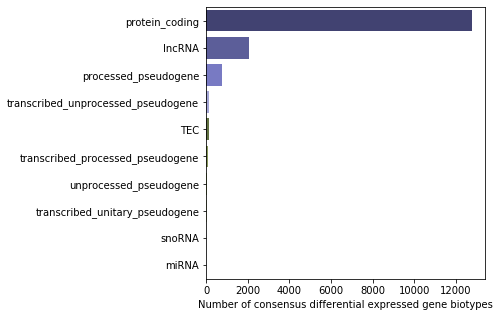

In [3]:
plt.rcParams['svg.fonttype'] = 'none'


def get_biotype_differential_exp(df1, df2, df3):

    ad2 = df1.set_index("ensembl_gene_id_version")
    ad3 = df2.set_index("ensembl_gene_id_version")[[
        "gene_biotype", "baseMean"
    ]]
    eight = df3.set_index("ensembl_gene_id_version")[[
        "gene_biotype", "baseMean"
    ]]
    ad2_biotype = pd.merge(ad3,
                           ad2,
                           how="inner",
                           left_index=True,
                           right_index=True)
    all_biotype = pd.merge(ad2_biotype,
                           eight,
                           how="inner",
                           left_index=True,
                           right_index=True)
    biotype_counts = pd.DataFrame(
        all_biotype["gene_biotype_x"].value_counts().sort_values(
            ascending=False).iloc[:10])
   
    # get the number of counts for each biotype
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(data=biotype_counts.T, orient="h", palette="tab20b")
    plt.xlabel("Number of consensus differential expressed gene biotypes")
    #plt.savefig("Consensus-biotype-expression.svg", quality = 90, dpi = 600, transparent = True, bbox_inches = "tight")


get_biotype_differential_exp(ad2, ad3, eight)

                           0         1         2         3         4  \
external_gene_name                                                     
A1BG               -1.009933 -0.926393 -0.900050 -0.778902 -0.638063   
ABHD2              -0.792052 -0.788651 -0.791197 -1.252975 -0.995066   
AC003681.1          0.621397  0.473684 -0.072030 -0.607909  0.841732   
AC067852.3         -1.395012 -0.737278 -1.249986 -1.344368 -0.221268   
AC087163.2         -0.494312 -0.663351 -0.380047 -0.292224 -0.513602   
...                      ...       ...       ...       ...       ...   
TRIM35              0.564172  0.384568  1.112505 -1.615006 -1.021456   
UNC13B              0.854482  0.638213  0.796213 -2.168336 -0.960272   
USH1G               0.838723  1.038528  0.816323 -1.182848 -1.109770   
WTAPP1              0.238935 -0.034644  0.654800 -0.101023  0.309611   
ZNF488              1.179074  1.107315  1.156010 -1.481935 -1.461760   

                           5         6         7         8     

<Figure size 432x288 with 0 Axes>

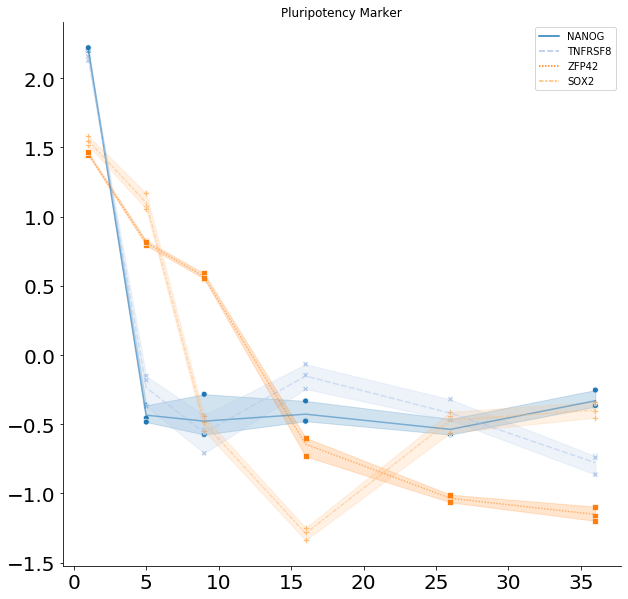

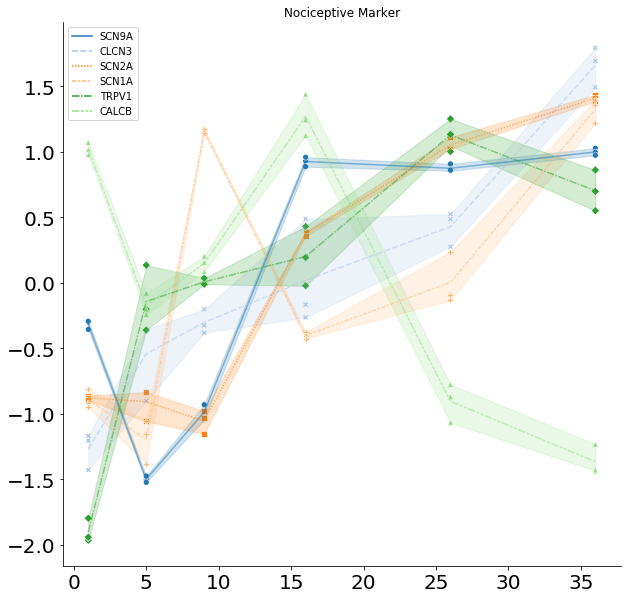

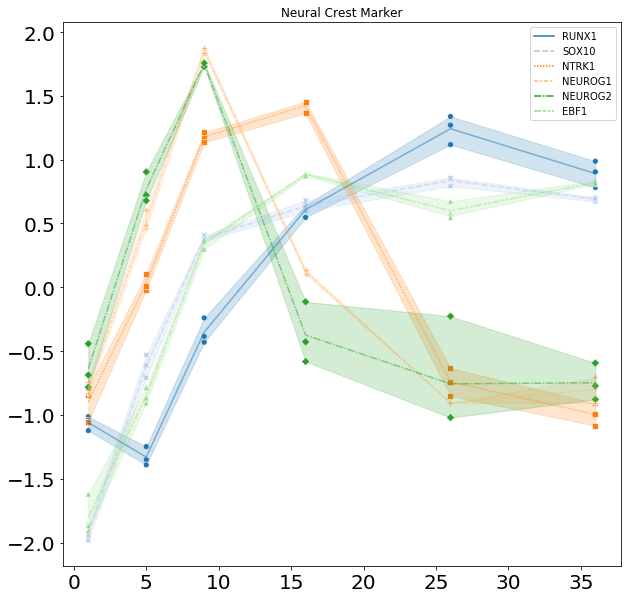

In [9]:
# here we draw the potential plots of gene after z-score normalization
nociceptor_marker = [
    "CALCB", "CALCA", "TRPV1", "SCN1A", "SCN2A", "SCN9A", "CLCN3"
]
pluripotency_marker = ["SOX2", "POU5F1", "NANOG", "ZFP42", "TNFRSF8"]
neural_crest_marker = [
    "NEUROG1", "NEUROG2", "SOX10", "EBF1", "TFAP2", "NTRK1", "RUNX1"
]
nociceptor_marker


def draw_curves(df, genes_liste, title):
    df_curv = df.reset_index().set_index("external_gene_name").iloc[:, 3:-1]
    print(df_curv)
    df_curv.columns = [
        1, 1, 1, 5, 5, 5, 9, 9, 9, 16, 16, 16, 26, 26, 26, 36, 36, 36
    ]
    df_curves = df_curv[df_curv.index.isin(genes_liste)]
    sns.despine()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=df_curves.T,
                    hue=df_curves.index,
                    palette="tab20",
                    legend=False)
    sns.lineplot(data=df_curves.T, alpha=0.5, palette="tab20"),
    plt.title(title)
    plt.savefig(title + "_gene_expression_marker.svg",
                quality=90,
                dpi=600,
                transparent=True,
                bbox_inches="tight")


draw_curves(supercluster_mrna, pluripotency_marker, "Pluripotency Marker")
draw_curves(supercluster_mrna, nociceptor_marker, "Nociceptive Marker")
draw_curves(supercluster_mrna, neural_crest_marker, "Neural Crest Marker")

In [21]:
# miRNA expression data is used for plotting marker miRNAs

pluripotency_mirna = [
    "hsa-miR-302a-3p", "hsa-miR-200a-3p", "hsa-miR-302b-3p", "hsa-miR-302c-5p"
]

neural_crest_mirna = [
    "hsa-miR-25-3p", "hsa-miR-493-5p", "hsa-miR-18b-5p", "hsa-miR-129-2-3p"
]

nociceptor_mirna = ["hsa-let-7d-5p", "hsa-let-7g-3p", "hsa-miR-450a-1-3p"]


def draw_curves_mirna(df, mirna_liste, title):
    df_curv = df.reset_index().set_index("Row.names").iloc[:, 1:-1]

    df_curv.columns = [
        1, 1, 1, 5, 5, 5, 9, 9, 9, 16, 16, 16, 26, 26, 26, 36, 36, 36
    ]

    df_curves = df_curv[df_curv.index.isin(mirna_liste)]

    sns.despine()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=df_curves.T,
                    hue=df_curves.index,
                    palette="tab20b",
                    legend=False)
    sns.lineplot(data=df_curves.T, alpha=0.5, palette="tab20b"),
    plt.title(title)
    plt.savefig(title + "_mirna_expression_marker.svg",
                quality=90,
                dpi=600,
                transparent=True,
                bbox_inches="tight")


draw_curves_mirna(supercluster_mirna, pluripotency_mirna, "Pluripotency")
draw_curves_mirna(supercluster_mirna, neural_crest_mirna, "Neural Crest")
draw_curves_mirna(supercluster_mirna, nociceptor_mirna, "Nociceptor")

                    cluster         0         1         2         3         4  \
Row.names                                                                       
hsa-let-7a-2-3p       green -0.711736 -0.711736 -0.711736 -0.711736 -0.711736   
hsa-let-7c-5p         green -0.560707 -0.623310 -0.539775 -1.071559 -1.149861   
hsa-let-7d-3p         green -0.512757  0.015488 -0.433397 -0.602403 -1.094916   
hsa-let-7d-5p         green -0.067375 -0.178586 -0.012618 -0.968527 -0.827864   
hsa-let-7e-3p         green -0.580906 -0.438346 -1.200680 -1.110815 -0.897222   
...                     ...       ...       ...       ...       ...       ...   
hsa-miR-6751-3p   lightcyan  0.712670  0.575618  0.775071 -0.346161  0.346283   
hsa-miR-7155-3p   lightcyan -0.158999 -0.059437  0.052618  0.841930  0.268979   
hsa-miR-7851-3p   lightcyan  0.678302  1.052303  0.533401  0.332010  0.389328   
hsa-miR-92a-1-5p  lightcyan  1.067266  1.006404  1.001223  0.828628  0.914430   
hsa-miR-92a-2-5p  lightcyan 

ValueError: Length mismatch: Expected axis has 19 elements, new values have 18 elements

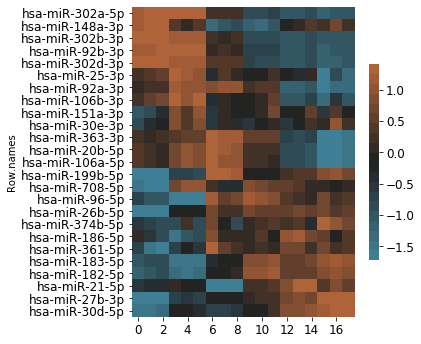

In [24]:
gesamt_expression = pd.merge(supercluster_mirna,
                             baseline_expression,
                             how="left",
                             left_on="Row.names",
                             right_on="Row.names")


def top10_mirnas_cluster(df, cluster):
    """ get the top 5 mirnas per cluster"""
    expression = pd.DataFrame()

    for i in [3, 4, 5, 2, 1]:
        df_express = df[df[cluster] == i].sort_values(
            ["baseMean"],
            ascending=False).set_index("Row.names").iloc[:5, 1:-2]
        expression = pd.concat([expression, df_express])

    return expression


top_expressed = top10_mirnas_cluster(gesamt_expression, "hierachical_cluster")

In [ ]:
fig, ax = plt.subplots(figsize=(5, 18))
sns.heatmap(top_expressed,
            square=True,
            robust=True,
            cbar_kws={"shrink": 0.2},
            cmap=sns.diverging_palette(222, 30, l=50, n=20, center="dark"))
plt.savefig("top5_expressed_miRNAs_cluster.svg",
            quality=90,
            transparent=True,
            dpi=600,
            bbox_inches="tight")

In [4]:
# get the enriched genes pathways
import requests


def mirna_analysis_go_div(diana_df, species, cluster=None):
     """diana_dictionary == output von diana_only mirnas bzw. eigener DataFrame,
     col_name is der Name der Column, die die Gene beinhaltet
     sources = sind die sources die man gerne erhalten möchte als Liste bspw. ["GO"] wären alle Termen
     ["GO:BP"] wäre einzig und allein Biological Process
     KEGG ist ein optionaler parameter der angegeben kann wenn man auch an KEGG Pathways interessiert ist
     """
        
    go_profiler = {}
    df_go_end = pd.DataFrame()
    if cluster != None:
        for i in sorted(set(diana_df[cluster].tolist())):
            diana_df_end = diana_df.loc[diana_df[cluster] == i]
            protein_list = list(set(diana_df_end["gene_name"].tolist()))
            print(len(protein_list))

            r = requests.post(
                url='https://biit.cs.ut.ee/gprofiler/api/gost/profile/',
                json={
                    'organism': species,
                    'query': protein_list,
                    'sources': ["GO:BP", "GO:MF", "GO:CC", "KEGG"],
                },
                headers={'User-Agent': 'FullPythonRequest'})
            try:
                data = r.json()["result"]
                parents_list = []
                go_list = []
                p_value = []
                desc_value = []
                source_list = []
                for n in data:
                    go_list.append(n["native"])
                    for t in n["parents"]:
                        parents_list.append(t)
                end_list = [i for i in go_list if i not in parents_list]
                for m in data:
                    if m["native"] in end_list:
                        p_value.append(m["p_value"])
                for l in data:
                    if l["native"] in end_list:
                        desc_value.append(l["name"])
                for l in data:
                    if l["native"] in end_list:
                        source_list.append(l["source"])
                go_profiler.update({
                    "p-value": p_value,
                    "go-terms": end_list,
                    "description": desc_value,
                    "source": source_list
                })
                df_go = pd.DataFrame(
                    columns=["go-terms", "description", "source", "p-value"])
                df_go["go-terms"] = list(end_list)
                df_go["description"] = desc_value
                df_go["source"] = source_list
                df_go["p-value"] = p_value
                df_go["cluster"] = df_go.shape[0] * [str(i)]
                df_go_end = df_go_end.append(df_go)

            except KeyError as e:
                pass

    #df_go_end.to_excel("signed_go_enrichment_analysis_filtered.xlsx")
    return (df_go_end)